# ModelT_RMSOptimizer_executado.ipynb-1

Aqui definimos os caminhos para as pastas de treino, validação e teste. Estas pastas contêm as imagens que serão usadas para treinar, validar e testar o modelo de classificação de imagens.

Em seguida, o código usa a função "image_dataset_from_directory" do Keras para carregar as imagens das pastas especificadas. As imagens são redimensionadas para 150x150 pixels e agrupadas em lotes de 32.

In [9]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

In [10]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


# ModelT_RMSOptimizer_executado.ipynb-2

Importamos as bibliotecas necessárias e definimos a base convolucional do modelo usando a arquitetura VGG16 pré-treinada no dataset ImageNet.

Em seguida, o código define uma função para extrair características e rótulos dos datasets. As imagens são pré-processadas e passadas pela base convolucional para extrair as características. Estas características e rótulos são então retornados.

Finalmente, o código extrai as características e rótulos dos datasets de treino, validação e teste. Em seguida, define um modelo denso que recebe as características extraídas como entrada e produz uma saída de 10 unidades com ativação softmax, correspondendo às 10 classes do problema de classificação.

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf  # Import TensorFlow explicitly

from tensorflow.keras.applications import VGG16  # Correct import statement for VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Função para extrair características e rótulos dos datasets
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)


# Extrair características dos datasets de treino, validação e teste
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

# Definição do modelo denso a partir das características extraídas
inputs = keras.Input(shape=(4, 4, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# ModelT_RMSOptimizer_executado.ipynb-4


O código define um callback ReduceLROnPlateau. Este callback reduz a taxa de aprendizagem quando uma métrica parou de melhorar. Neste caso, a taxa de aprendizagem será reduzida por um fator de 0.2 se "val_loss" não melhorar após 2 épocas ("patience=2"). A taxa de aprendizagem não será reduzida abaixo de 0.001 ("min_lr=0.001").

Em seguida, o código define um callback EarlyStopping. Este callback interrompe o treino quando uma métrica monitorada parou de melhorar. Neste caso, o treino será interrompido se "val_loss" não melhorar após 10 épocas ("patience=10"). "restore_best_weights=True" significa que os pesos do modelo no final do treino serão os pesos do modelo na época com o melhor valor de "val_loss".

Finalmente definimos um callback "ModelCheckpoint". Este callback guarda o modelo após cada época. "save_best_only=True" significa que o modelo atual será salvo apenas se o "val_loss" tiver melhorado, o que permite guardar apenas o melhor modelo.

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(),  # Use RMSprop optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [15]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='C:/Users/flavi/Desktop/projetoClassificaoDeImagens/dl_project_2201707_2211044/ModelosT/ModelT_RMSpropOptimizer.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [16]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]

# Train the model using the extracted features
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6706 - loss: 2.5303 - val_accuracy: 0.8424 - val_loss: 0.7643 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8164 - loss: 0.9273 - val_accuracy: 0.8472 - val_loss: 0.8579 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8437 - loss: 0.8118 - val_accuracy: 0.8564 - val_loss: 0.8702 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8638 - loss: 0.7647 - val_accuracy: 0.8624 - val_loss: 1.0881 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8746 - loss: 0.7093 - val_accuracy: 0.8693 - val_loss: 1.0080 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8878 - loss: 0.6249 - val_accuracy: 0.8660 - val_loss: 1.2631 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.

# ModelT_RMSOptimizer_executado.ipynb-5

Importamos a biblioteca matplotlib para a visualização dos dados. Em seguida, ele está a mostrar a precisão da de treino e validação ao longo das épocas. A precisão de treino é exibida em pontos azuis ('bo') e a precisão de validação é exibida em linha azul ('b').

Em seguida, o código está a mostrar a perda de treino e validação ao longo das épocas. A perda de treino é exibida em pontos azuis ('bo') e a perda da validação é exibida em linha azul ('b').

Estes gráficos ajudam a visualizar o desempenho do modelo durante o treino.

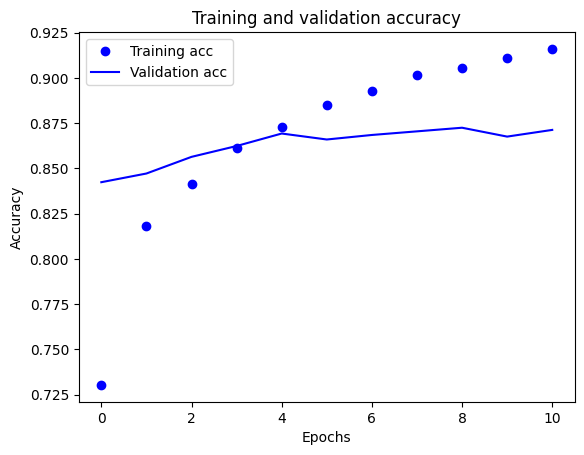

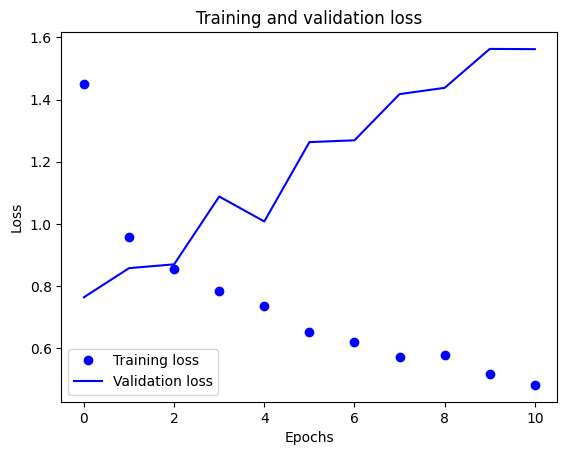

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ModelT_RMSOptimizer_executado.ipynb-6


O código está  a avaliar o desempenho do modelo no conjunto de validação. A função "model.evaluate" retorna a perda e a precisão do modelo no conjunto de validação.

Em seguida, avaliamos o desempenho do modelo treinado no conjunto de teste. A função "model.evaluate" retorna a perda e a precisão do modelo no conjunto de teste.

Estas avaliações fornecem uma medida do desempenho do modelo em dados não vistos durante o treino.


In [18]:
val_loss, val_acc = model.evaluate(val_features, val_labels)
print('Validation Accuracy:', val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8458 - loss: 0.7600
Validation Accuracy: 0.8424000144004822


In [19]:
loss, accuracy = model.evaluate(test_features, test_labels)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8454 - loss: 0.7394
Loss: 0.736763596534729, Accuracy: 0.8446999788284302


# ModelT_RMSOptimizer_executado.ipynb-7

Este bloco de código está a avaliar o desempenho do modelo treinado no conjunto de teste. A função "evaluate_model" retorna os rótulos verdadeiros e os rótulos previstos para as características de teste.

Em seguida, o código está a calcular a matriz de confusão e a exibindo num gráfico de calor. A matriz de confusão é uma tabela que é frequentemente usada para descrever o desempenho de um modelo de classificação.

Finalmente, o código está a gerar um relatório de classificação e exibe a precisão, recall e F1-score para cada classe. Estas métricas são importantes para avaliar o desempenho do modelo em cada classe individualmente.

# Análise dos Resultados

Os resultados mostram a precisão, recall e F1-score para cada uma das 10 classes, bem como a precisão geral do modelo.

A precisão é a proporção de previsões corretas para uma determinada classe em relação a todas as previsões para essa classe. O recall é a proporção de previsões corretas para uma determinada classe em relação a todas as instâncias reais dessa classe. O F1-score é a média harmónica entre precisão e recall, fornecendo um equilíbrio entre estas duas métricas.

A precisão geral é a proporção de previsões corretas em relação a todas as previsões feitas.

Aqui estão algumas observações sobre os resultados:

- A classe 1 (segunda linha) tem a maior precisão, o que significa que o modelo é muito bom a prever esta classe corretamente.
- A classe 3 (quarta linha) tem o menor recall, o que significa que o modelo tem dificuldade em identificar esta classe corretamente.
- A classe 6 (sétima linha) tem o maior F1-score, o que significa que o modelo tem um bom equilíbrio entre precisão e recall para esta classe.
- A precisão geral do modelo é de 0.84, o que significa que o modelo faz previsões corretas para 84% das instâncias no conjunto de teste.

Estes resultados podem ser usados para identificar onde o modelo está a ter um bom desempenho e onde pode ser necessário mais trabalho para melhorar o desempenho.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


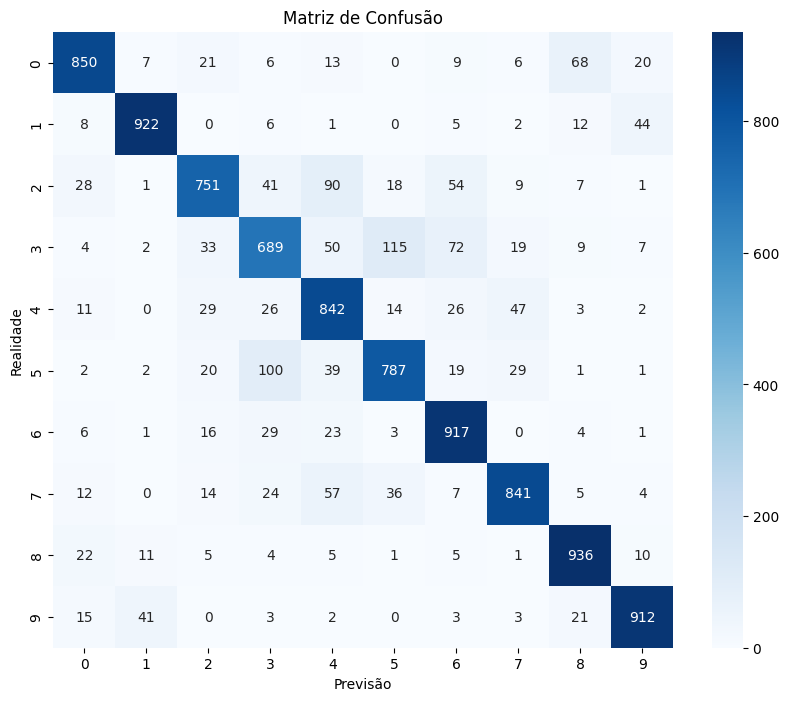

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.93      0.92      0.93      1000
           2       0.84      0.75      0.80      1000
           3       0.74      0.69      0.71      1000
           4       0.75      0.84      0.79      1000
           5       0.81      0.79      0.80      1000
           6       0.82      0.92      0.87      1000
           7       0.88      0.84      0.86      1000
           8       0.88      0.94      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



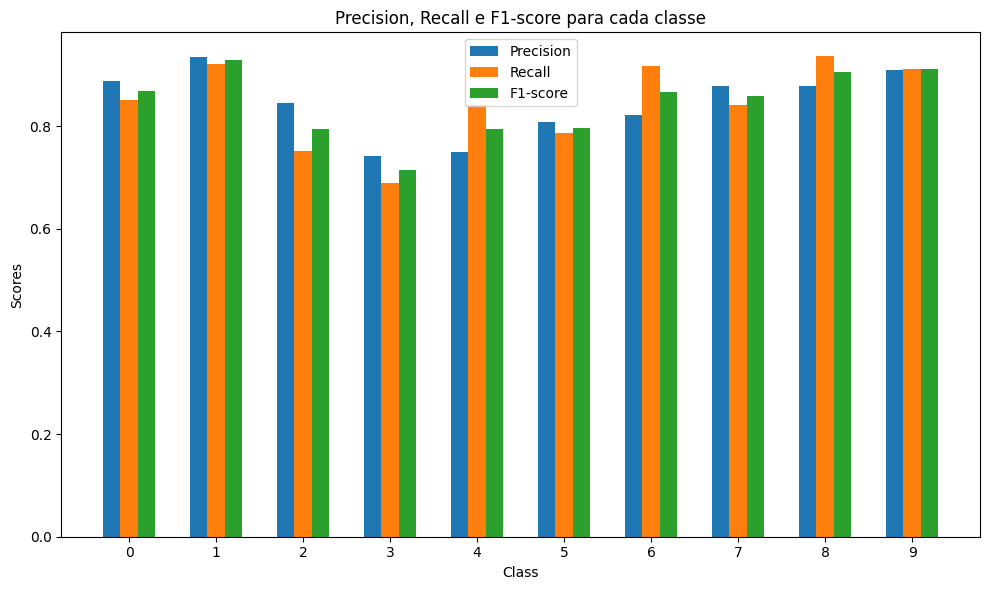

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, features, labels):
    predictions = model.predict(features)
    predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
    return labels, predicted_labels  # Return true labels and predicted labels

# Obter previsões e rótulos reais para o conjunto de testes
true_labels, predicted_labels = evaluate_model(model, test_features, test_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Print classification report
class_names = [str(i) for i in range(10)]  # Define class names based on your dataset
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Plot precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

metrics = {'precision': [], 'recall': [], 'f1-score': []}
for cls in class_names:
    metrics['precision'].append(report[cls]['precision'])
    metrics['recall'].append(report[cls]['recall'])
    metrics['f1-score'].append(report[cls]['f1-score'])

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, metrics['precision'], bar_width, label='Precision')
plt.bar(index + bar_width, metrics['recall'], bar_width, label='Recall')
plt.bar(index + 2*bar_width, metrics['f1-score'], bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall e F1-score para cada classe')
plt.xticks(index + bar_width, class_names)
plt.legend()

plt.tight_layout()
plt.show()